In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv


In [2]:
df1 = pd.read_csv('../input/covid-19-nlp-text-classification/Corona_NLP_train.csv',encoding= 'ISO-8859-1')
df2 = pd.read_csv('../input/covid-19-nlp-text-classification/Corona_NLP_test.csv',encoding= 'ISO-8859-1')

In [3]:
df1.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

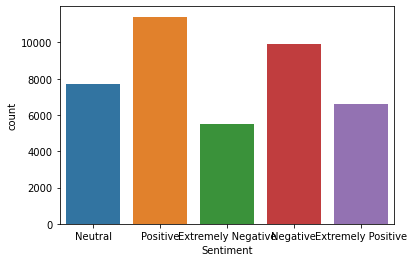

In [5]:
import seaborn as sns
sns.countplot(x = 'Sentiment', data = df1)

In [6]:
df1.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [7]:
df1= df1[['OriginalTweet','Sentiment']]

df1.rename({'OriginalTweet':'text','Sentiment':'labels'},axis=1,inplace=True)

In [8]:
df1['text'][:10].values

array(['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8',
       'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order',
       'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P',
       "My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",
       "Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The 

In [9]:
df1['labels'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: labels, dtype: int64

In [10]:
encoder = {'Neutral':0, 'Positive':1, 'Extremely Negative':2, 'Negative':2,
       'Extremely Positive':1,'Irrelevant':0,1:1,0:2}
# encoder_to_label = {0:'Neutral', 1:'Positive', 2:'Negative'}
df1.labels = df1.labels.map(encoder)

In [11]:
print('# Duplicate : ',df1.duplicated().sum())
df1.drop_duplicates(inplace=True)
print('# NANS:',df1.isna().sum())
df1.dropna(inplace=True)
df1.reset_index(drop=True,inplace=True)

# Duplicate :  0
# NANS: text      0
labels    0
dtype: int64


In [12]:
print(df1['labels'].value_counts())
df1.labels = df1.labels.astype('int32')

1    18046
2    15398
0     7713
Name: labels, dtype: int64


In [13]:
np.array(df1['labels']).reshape(-1,1)

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [2]], dtype=int32)

In [14]:
import plotly.express as px
px.bar(df1['labels'].value_counts())

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    41157 non-null  object
 1   labels  41157 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 482.4+ KB


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [17]:
df1.text.head(5).values , df1.labels.head(5).values

(array(['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8',
        'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order',
        'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P',
        "My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",
        "Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty.

In [18]:
import re 
import nltk

def clean_text(text):
    url_regex ='((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*'

    text = text.lower()
#     text = re.sub('@(\w)+',' username ',text)
#     text = re.sub('#(\w)+',' hastag ',text)
#     text = re.sub(url_regex,' url ',text)
    text = re.sub(url_regex,' ',text)

    text = re.sub('@(\w)+','  ',text)
    text = re.sub('#(\w)+','  ',text)
    text = re.sub('(\r)+',' ',text)
    text = re.sub('(\n)+',' ',text)
    
    text = re.sub('(\?)+',' ',text)
    text = re.sub('(\.)+',' ',text)
    symbol = [
        'â\x97','â\x85','â\x92','â\x92','â\x92t','Â\x93','Â\x85',
        'Â\x96','Â\x92','Â\x94','â\x93','â\x91','â\x94','â\x96','â','â·','\x80'
            ]
    for i in symbol:
        text = re.sub(i,' ',text)
    html =[
        '&amp;'
          ]
    for i in html:
        text = re.sub(i,' & ',text)
    text = re.sub('\'','',text) 
    text = re.sub('https*',' ',text) 

    
    text = re.sub('!+','  ',text)    
    
    text = re.sub(':\(',' sad ',text)
    text = re.sub('/+',' ',text)
    text = re.sub('\|+',' ',text)
    
    # Word Tokenizer
    tokenizer = nltk.tokenize.word_tokenize
    
    # Drop Stop Words
    english_stop_words = nltk.corpus.stopwords.words('english')
    text = " ".join([word for word in tokenizer(text) if word not in english_stop_words ])
    
    text = re.sub('\s+',' ',text)
    return text

In [19]:
df1['clean_text'] = df1['text'].apply(clean_text)
df1['length']     = df1.clean_text.apply(lambda x:len(x.split()))

print('before : ')
print(df1.text.apply(lambda x:len(x.split())).min())
print(df1.text.apply(lambda x:len(x.split())).max())

print('after : ')
print(df1.clean_text.apply(lambda x:len(x.split())).min())
print(df1.clean_text.apply(lambda x:len(x.split())).max())

df1 = df1[df1.length > 0]
df1.reset_index(drop=True,inplace=True)

before : 
1
64
after : 
0
75


In [20]:
import collections
# # most common words in data set
print(collections.Counter(' '.join(df1.text).split()).most_common(20))

[('the', 40343), ('to', 37304), ('and', 23075), ('of', 21235), ('a', 17934), ('in', 17669), ('for', 13309), ('#coronavirus', 12219), ('is', 11581), ('are', 10784), ('on', 8895), ('I', 8339), ('you', 7615), ('at', 7318), ('prices', 6095), ('with', 5974), ('have', 5866), ('this', 5830), ('that', 5829), ('be', 5354)]


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

def get_n_grams(text,low_n,high_n,top_number):
    '''
    Function to Make a tuple of words and the count of each word repeated 
    in the List
    
    input ->  list of text or pandas series, n_gram_range (low ,high) , 
              number of top word 
    
    '''
    # create vocabulary
    vec = CountVectorizer(ngram_range=(low_n,high_n)).fit(text)
    B_O_G = vec.transform(text)
    
    # Get words Count
    words_count = B_O_G.sum(axis=0)
    
    # create list of words counts
    word_counts_list = np.array(words_count)[0].tolist()
    
    # create tuple of word and words count
    data = [ (word ,word_counts_list[idx]) for word,idx in vec.vocabulary_.items() ]
    
    # sort words by count descending
    sorted_data = sorted(data,key=lambda x:x[1] ,reverse=True)
    sorted_data = sorted_data[:top_number]
    new_s = []
    for d , n in sorted_data:
        new_s.append([d ,n])
    
    del vec , data ,B_O_G ,words_count,word_counts_list ,sorted_data
    plt.figure(figsize=(10,5))
    sns.barplot(data = pd.DataFrame(new_s,columns=['word','count']),x='word',y='count')
    plt.xticks(rotation=90)
    plt.show()
    
    return pd.DataFrame(new_s,columns=['word','count'])

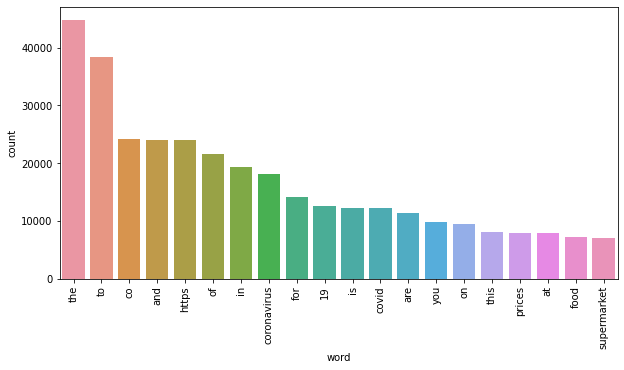

,word,count
0,the,44867
1,to,38472
2,co,24105
3,and,24089
4,https,23991
5,of,21547
6,in,19316
7,coronavirus,18145
8,for,14059
9,19,12594


In [22]:
get_n_grams(df1.text,1,1,20)

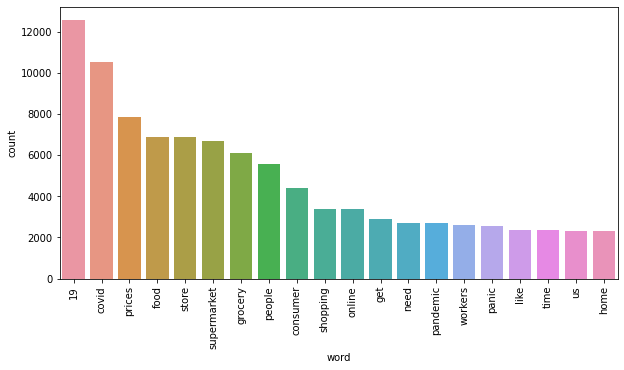

,word,count
0,19,12576
1,covid,10530
2,prices,7834
3,food,6863
4,store,6862
5,supermarket,6693
6,grocery,6095
7,people,5543
8,consumer,4409
9,shopping,3374


In [23]:
get_n_grams(df1.clean_text,1,1,20)

In [24]:
from wordcloud import WordCloud

def MakeCloud(text , title = 'Word Clouds' , w = 15 , h = 15):
    plt.figure(figsize=(w,h))
    WC = WordCloud(background_color="white").generate(" ".join(text))
    plt.imshow(WC)
    plt.axis("off")
    plt.title(title)
    plt.show()   

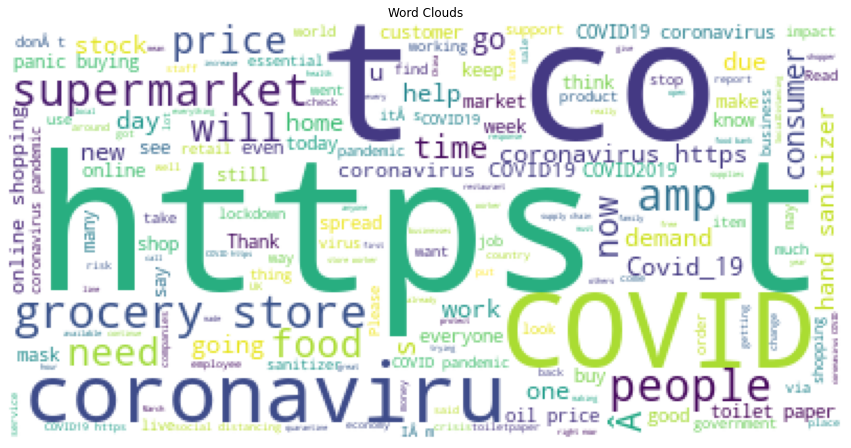

In [25]:
MakeCloud(df1.text)

In [26]:
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression ,Ridge ,Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC ,LinearSVC
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.metrics import confusion_matrix , classification_report ,f1_score , accuracy_score ,precision_score ,recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

def Create_pipe(models,df,text_column,label_column):
    # SPLIT DATA TO TRAIN & TEST
    train ,test =train_test_split(df,test_size=.3,random_state=42)
    
    accuracy_scores, recall_scores, precision_scores = [], [], []
    for model in tqdm.tqdm(models):
        try:
            pipe_model = [
                ('tf_idf',TfidfVectorizer()),
                ('model',model)
                         ]
            my_pipe = Pipeline(pipe_model)
            my_pipe.fit(train[text_column],train[label_column])
            my_pipe.score(test[text_column],test[label_column])
            accuracy_scores.append([my_pipe.score(test[text_column],test[label_column]),my_pipe['model']])

        except:
            print('can\'t',model)
    del train ,test ,pipe_model ,my_pipe
    return accuracy_scores

In [27]:
models = [
            LogisticRegression(),
            SVC(),
            RandomForestClassifier(random_state=42),
            KNeighborsClassifier(),
            LinearSVC(random_state=42),
            MultinomialNB()
    
         ]

data = Create_pipe(models,df1,'clean_text','labels')
pd.DataFrame(data,columns=['accuracy_score','name']).sort_values(by='accuracy_score',ascending=False)

100%|██████████| 6/6 [13:08<00:00, 131.41s/it]


,accuracy_score,name
4,0.819420,LinearSVC(random_state=42)
0,0.801670,LogisticRegression()
1,0.789107,SVC()
2,0.752877,"(DecisionTreeClassifier(max_features='auto', r..."
5,0.652294,MultinomialNB()
3,0.218836,KNeighborsClassifier()
